In [59]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path.cwd().resolve().parent / "src"))

from project_setup import get_project_root, make_paths, new_run_dir, save_data
from plotting import savefig

root = get_project_root()
paths = make_paths(root)
run_dir = new_run_dir(paths, label="week_2")

print(f"Project root: {paths.root}")
print(f"Run directory: {run_dir}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project root: /Users/david/Code/msc
Run directory: /Users/david/Code/msc/outputs/runs/week_2


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv(paths.data_external / "week_2_sample.csv")

In [61]:
def ra_to_degrees(ra):
    arr = ra.split(':')
    hours = float(arr[0])
    mins = float(arr[1])
    secs = float(arr[2])
    
    return hours * 15 + mins / 4 + secs / 240

def dec_to_degrees(dec):
    sign = 1 if dec[0] == '+' else -1
    arr = dec[1:].split(':')
    degrees = float(arr[0])
    mins = float(arr[1])
    secs = float(arr[2])
    
    return sign * (degrees + mins / 60 + secs / 3600)

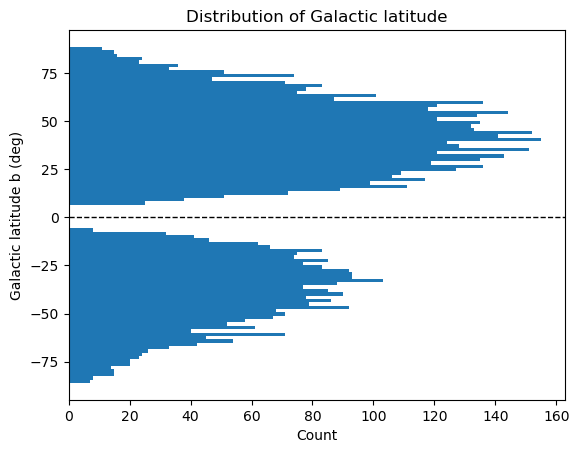

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/bin_galactic_latitude.png')

In [62]:
# plot galactic latitude
from turtle import color


df['b'] = pd.to_numeric(df['b'], errors='coerce')
d = df.dropna(subset=['b'])

fig = plt.figure()
plt.hist(d['b'], bins=100, orientation='horizontal')
plt.ylabel('Galactic latitude b (deg)')
plt.xlabel('Count')
plt.title('Distribution of Galactic latitude')
plt.axhline(0, linewidth=1, color='black', linestyle='--')  # mark the Galactic plane
plt.show()


savefig(fig, run_dir, "bin_galactic_latitude")


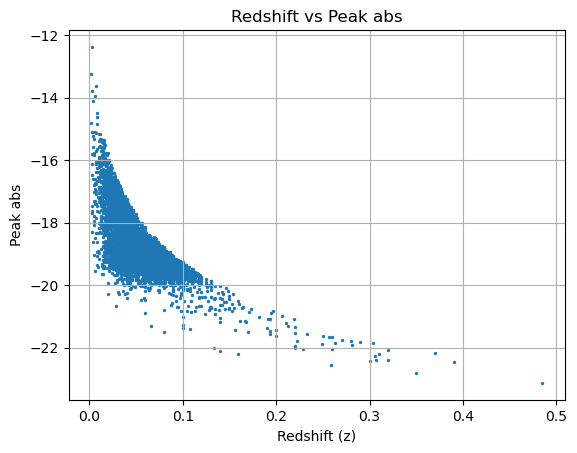

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/redshift_vs_peakabs.png')

In [63]:
# Plot Redshift vs peak absolute mag

df['peakabs']  = pd.to_numeric(df['peakabs'],  errors='coerce') 
df['redshift'] = pd.to_numeric(df['redshift'], errors='coerce')
df_plot = df.dropna(subset=['redshift', 'peakabs'])

fig = plt.figure()
plt.scatter(df_plot['redshift'], df_plot['peakabs'], s=2)
plt.xlabel('Redshift (z)')
plt.ylabel('Peak abs')
plt.title('Redshift vs Peak abs')
plt.grid(True)
plt.show()

savefig(fig, run_dir, "redshift_vs_peakabs")


Plot saved. Total points: 7056 (removed 14 rows with invalid data)


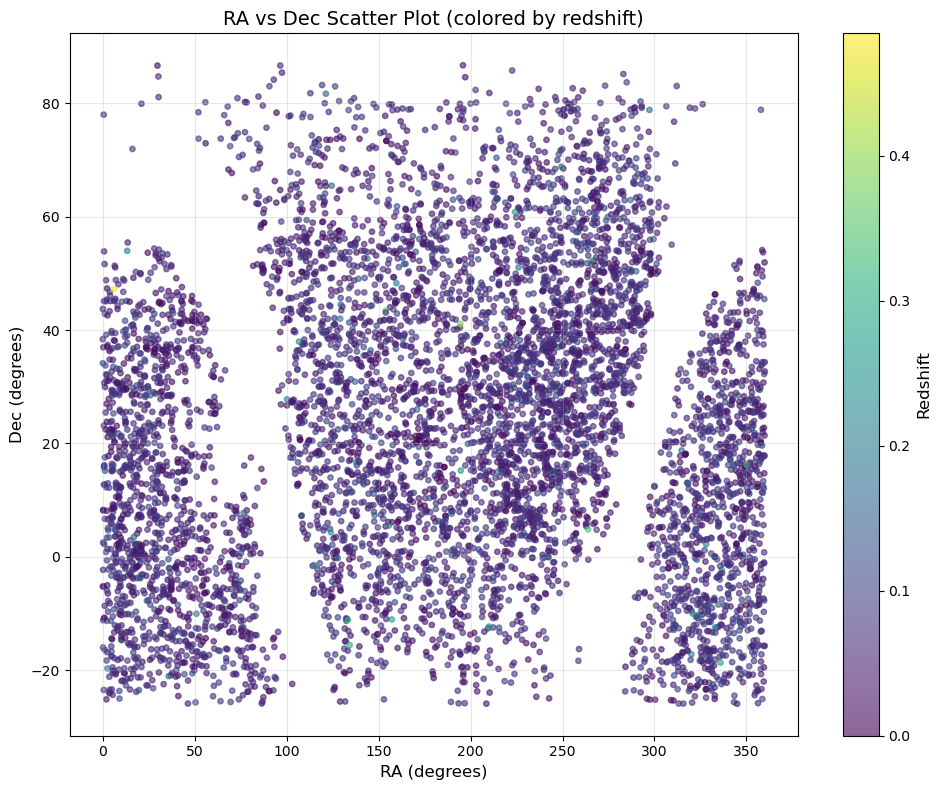

In [64]:
# Plot scatter RA vs Dec
# Apply conversions
df['RA_deg'] = df['RA'].apply(ra_to_degrees)
df['Dec_deg'] = df['Dec'].apply(dec_to_degrees)

# Convert redshift to numeric
df['redshift'] = pd.to_numeric(df['redshift'], errors='coerce')

# Filter out rows with invalid redshift values
df_scat = df.dropna(subset=['redshift', 'RA_deg', 'Dec_deg'])

# Create scatter plot with redshift as color
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df_scat['RA_deg'], df_scat['Dec_deg'], c=df_scat['redshift'], alpha=0.6, s=15, cmap='viridis')
ax.set_xlabel('RA (degrees)', fontsize=12)
ax.set_ylabel('Dec (degrees)', fontsize=12)
ax.set_title('RA vs Dec Scatter Plot (colored by redshift)', fontsize=14)
ax.grid(True, alpha=0.3)

# Add colorbar using matplotlib
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Redshift', fontsize=12)

savefig(fig, run_dir, "ra_dec_scatter_redshift")

print(f"Plot saved. Total points: {len(df_scat)} (removed {len(df) - len(df_scat)} rows with invalid data)")

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/extinction_vs_latitude.png')

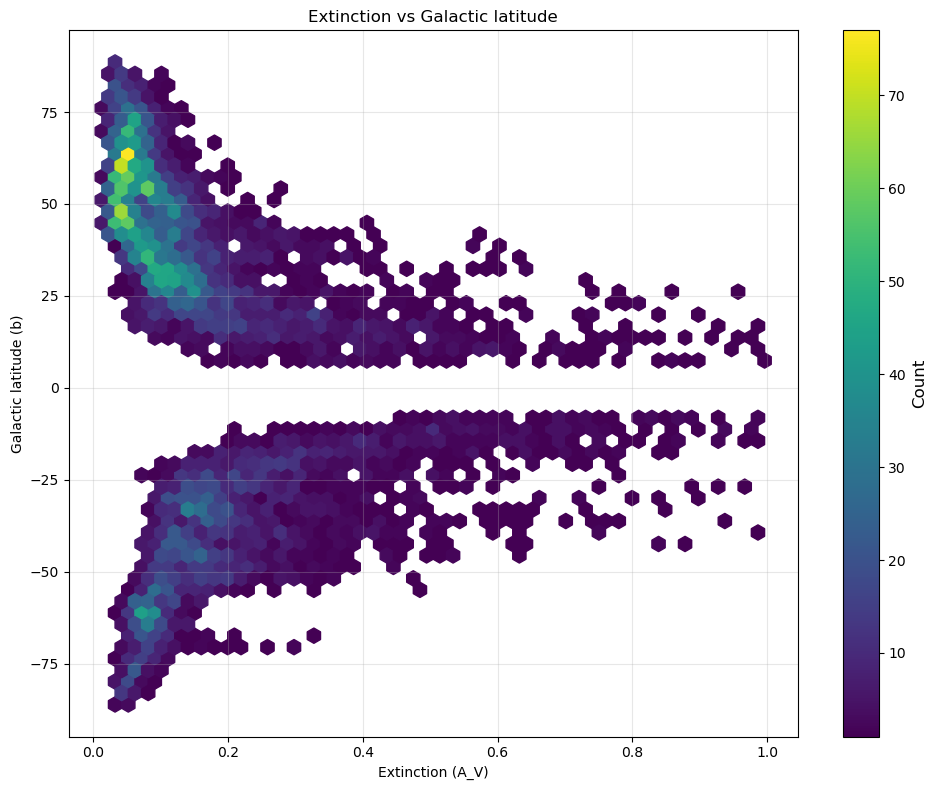

In [66]:

# extinction vs latitude
df['A_V']  = pd.to_numeric(df['A_V'],  errors='coerce') 
df['b'] = pd.to_numeric(df['b'], errors='coerce')
df_plot = df.dropna(subset=['A_V', 'b'])

fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(df_plot['A_V'], df_plot['b'], gridsize=50, cmap='viridis', mincnt=1)
ax.set_xlabel('Extinction (A_V)')
ax.set_ylabel('Galactic latitude (b)')
ax.set_title('Extinction vs Galactic latitude')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = fig.colorbar(hb, ax=ax)
cbar.set_label('Count', fontsize=12)

savefig(fig, run_dir, "extinction_vs_latitude")